In [1]:
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

import numpy as np
import torch

import helper

import matplotlib.pyplot as plt

In [6]:
from torchvision import datasets,transforms

transform=transforms.Compose([transforms.ToTensor(),transforms.Normalize((0.5,),(0.5,)),])

trainset=datasets.MNIST('~/.pytorch/MNIST_data/',download=True,train=True,transform=transform)
trainloader=torch.utils.data.DataLoader(trainset,batch_size=64,shuffle=True)

In [8]:
dataiter=iter(trainloader)
images,labels=next(dataiter)


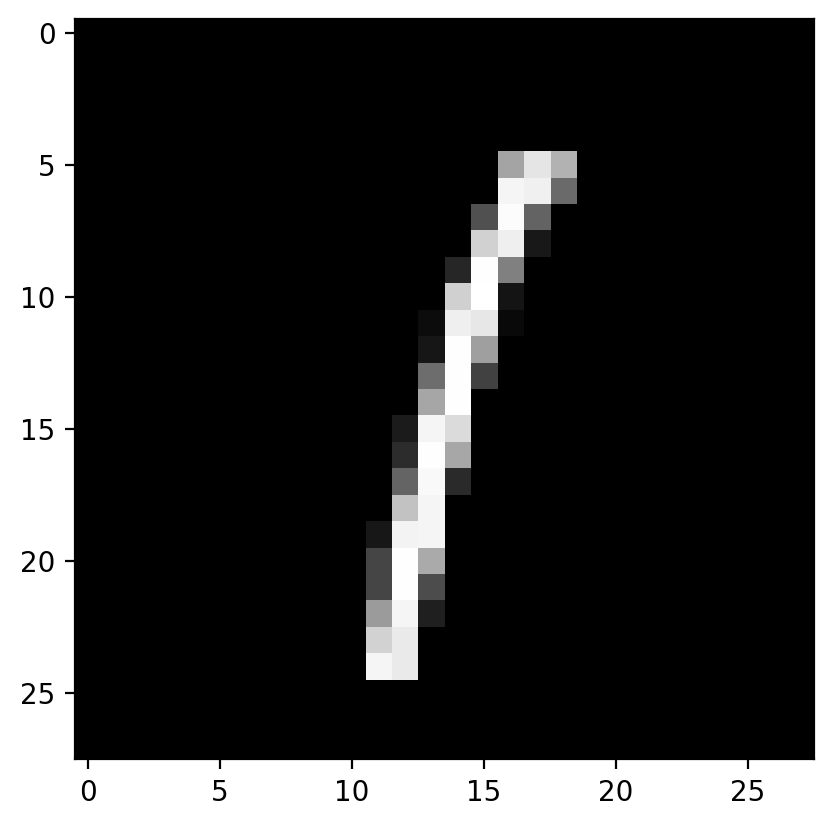

In [9]:
plt.imshow(images[1].numpy().squeeze(), cmap='Greys_r')

In [11]:
def activation(x):
    return 1/(1+torch.exp(-x))


inputs=images.view(images.shape[0],-1)
w1=torch.randn(784,256)
b1=torch.randn(256)

w2=torch.randn(256,10)
b2=torch.randn(10)

input_1=activation(torch.mm(inputs,w1)+b1)
output=activation(torch.mm(input_1,w2)+b2)
output.shape

torch.Size([64, 10])

In [13]:
def softmax(x):
    return torch.exp(x)/torch.sum(torch.exp(x),dim=1).view(-1,1)

probabilities=softmax(output)
probabilities.sum(dim=1)

tensor([1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000, 1.0000,
        1.0000])

In [14]:
from torch import nn

In [15]:
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden=nn.Linear(784,256)
        self.output=nn.Linear(256,10)

        self.sigmoid=nn.Sigmoid()
        self.softmax=nn.Softmax(dim=1)

    def forward(self,x):
        x=self.sigmoid(self.hidden(x))
        x=self.softmax(self.output(x))

        return x

In [16]:
model=Network()
model

Network(
  (hidden): Linear(in_features=784, out_features=256, bias=True)
  (output): Linear(in_features=256, out_features=10, bias=True)
  (sigmoid): Sigmoid()
  (softmax): Softmax(dim=1)
)

In [17]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden=nn.Linear(784,256)
        self.output=nn.Linear(256,10)

    def forward(self,x):
        x=F.sigmoid(self.hidden(x))
        x=F.softmax(self.output(x),dim=1)

        return x

In [18]:
import torch.nn.functional as F
class Network(nn.Module):
    def __init__(self):
        super().__init__()

        self.hidden1=nn.Linear(784,128)
        self.hidden2=nn.Linear(128,64)
        self.hidden3=nn.Linear(64,10)

    def forward(self,x):
        x=F.relu(self.hidden1(x))
        x=F.relu(self.hidden2(x))
        x=F.softmax(self.hidden3(x),dim=1)

        return x


In [19]:
model=Network()
model

Network(
  (hidden1): Linear(in_features=784, out_features=128, bias=True)
  (hidden2): Linear(in_features=128, out_features=64, bias=True)
  (hidden3): Linear(in_features=64, out_features=10, bias=True)
)

In [21]:
# Set biases to all zeros
model.hidden1.bias.data.fill_(0)

tensor([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
        0., 0., 0., 0., 0., 0., 0., 0.])

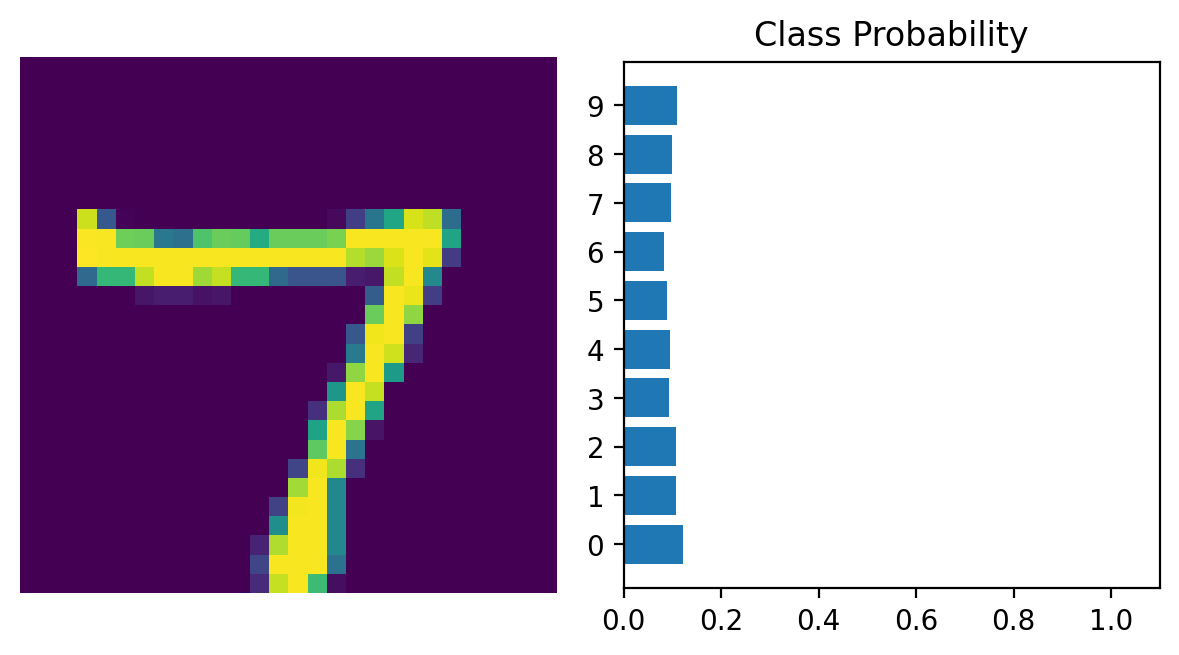

In [24]:
# Grab some data 
dataiter = iter(trainloader)
images, labels = next(dataiter)

# Resize images into a 1D vector, new shape is (batch size, color channels, image pixels) 
images.resize_(64, 1, 784)
# or images.resize_(images.shape[0], 1, 784) to automatically get batch size

# Forward pass through the network
img_idx = 0
ps = model.forward(images[img_idx,:])

img = images[img_idx]
helper.view_classify(img.view(1, 28, 28), ps)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=1)
)


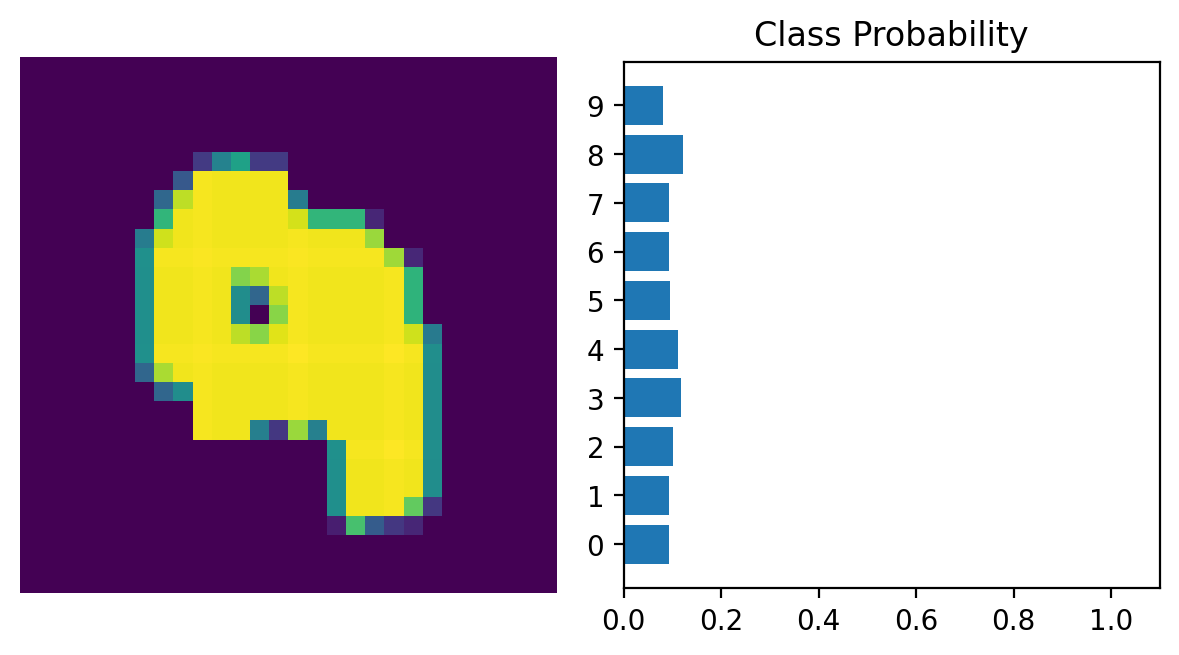

In [25]:
# Hyperparameters for our network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

# Build a feed-forward network
model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax(dim=1))
print(model)

# Forward pass through the network and display output
images, labels = next(iter(trainloader))
images.resize_(images.shape[0], 1, 784)
ps = model.forward(images[0,:])
helper.view_classify(images[0].view(1, 28, 28), ps)